# Insper - Ciência dos Dados 2022.2

## Engenharia - 2ºB

### Integrantes do grupo:

* Beatriz Rodrigues de Freitas

* Carlos Eduardo Porciuncula Yamada

* Verônica Luisa Ribeiro Lima

___
<div id='sumario'></div>

## Sumário

1. [Introdução](#intro)

2. [Minerando Dados e Características do Dataset](#data-mining)

3. [Modelos de Predição](#prediction)

4. [Processo e Estatísticas de Validação](#validation)

5. [Conclusão](#conclusion)

6. [Referências Bibliográficas](#ref)

___
<div id='intro'></div>

## 1. Introdução

### Objetivo

O objetivo deste projeto é criar um código capaz de prever o preço de um notebook (em euros) a partir de algumas features fornescidas pela base de dados "Laptop_price", disponibilizada na plataforma Kaggle por MUHAMMET VARLI em 2020. 
Os dados utilizados para a modelagem da target estão descritos a seguir:


### Descrição da base de dados

* `Company`: **object** → Fabricante do computador;

* `TypeName`: **object** → Tipo do uso;

* `Inches`: **float** → Tamanho (em polegadas);

* `Cpu`: **object** → Qual o processador;

* `Ram`: **object** → Quantidade de memória Ram;

* `Memory`: **object** → Quantidade de memória Rom, assim como o seu tipo;

* `Product`: **object** → Modelo do notebook;

* `ScreenResolution`: **object** → Resolução da tela;

* `OpSys`: **object** → Sistema operacional.


As bibliotecas utilizadas na contrução do robô serão as seguintes:

In [69]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics

#import plotly.graph_objs as go
#import chart_studio.plotly as py
#from plotly.graph_objs import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report

#from yellowbrick.classifier import ConfusionMatrix


In [70]:
celular = pd.read_csv('dados/celular_train.csv', sep=',',  encoding='latin-1')
celular.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


___
<div id='data-mining'></div>

## 2. Minerando Dados e Características do Dataset




In [71]:
dados = celular.loc[:, ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi', 'price_range']]

dados.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,1716,2603,11,2,9,1,1,0,2


In [72]:
dados.shape

(2000, 20)

[Voltar para o sumário](#sumario)


## 2.1 Análise exploratória


### 2.1 Disposição dos preços

Entendendo como o preço varia na base de dados

In [103]:
dados['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

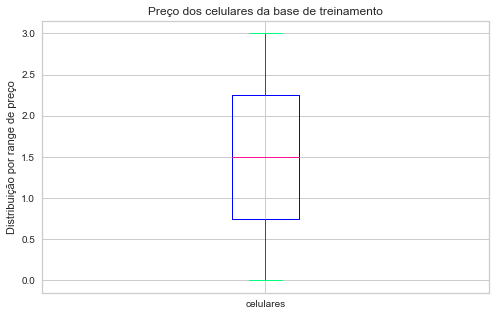

In [104]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.boxplot(dados['price_range'], labels = ['celulares'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Preço dos celulares da base de treinamento')
plt.ylabel('Distribuição por range de preço')

plt.show()

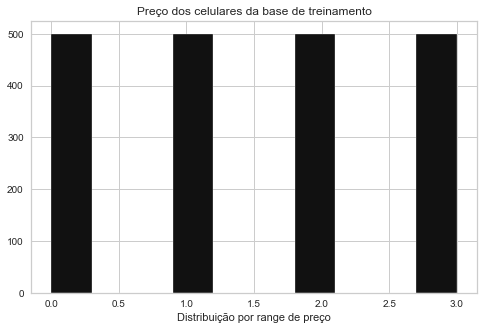

In [105]:
plt.figure(figsize=(8,5))   # substituir por gráfico de pizza

plt.subplot(111)
plt.hist(dados['price_range'], edgecolor='white', color='k')
plt.xlabel('Distribuição por range de preço')
plt.title("Preço dos celulares da base de treinamento")
plt.show()

### 2.2 Comparação das variáveis

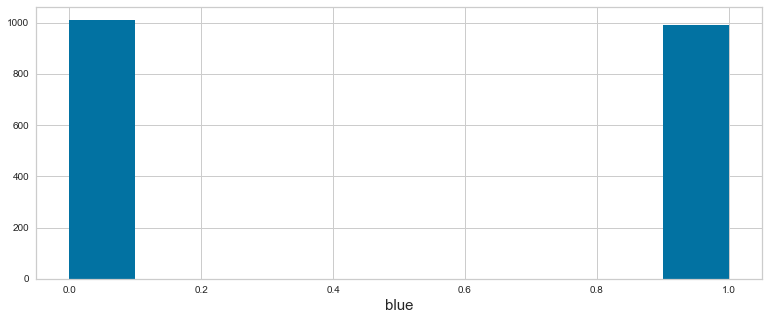

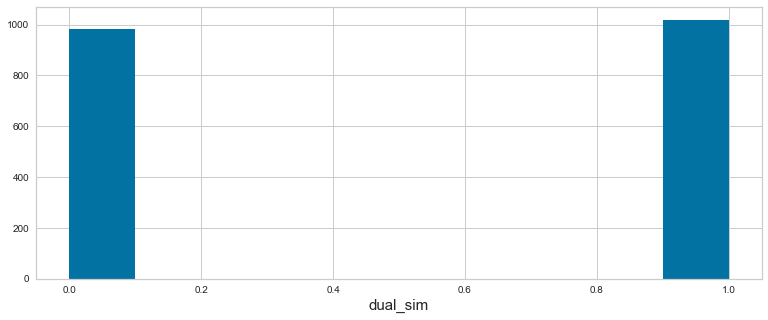

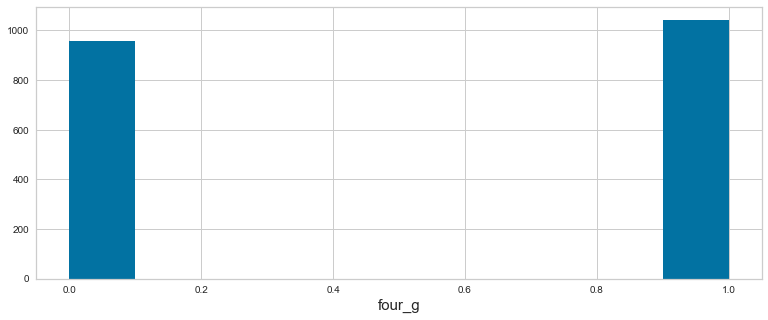

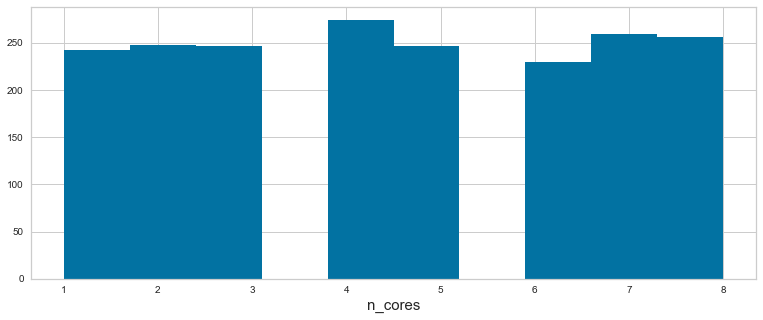

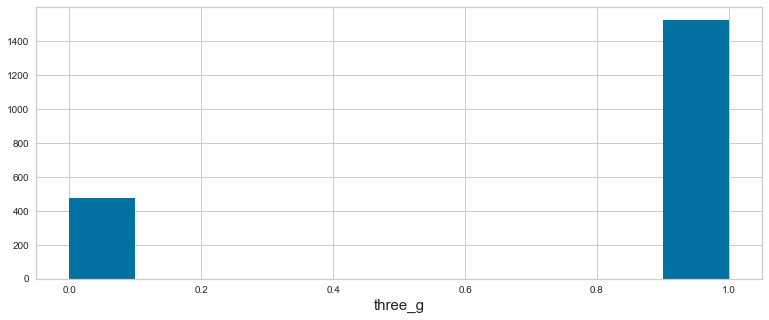

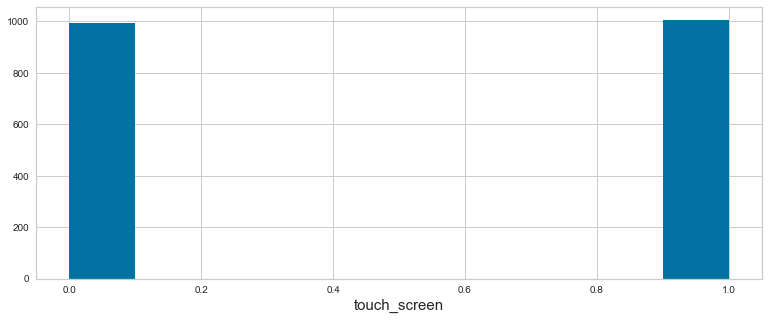

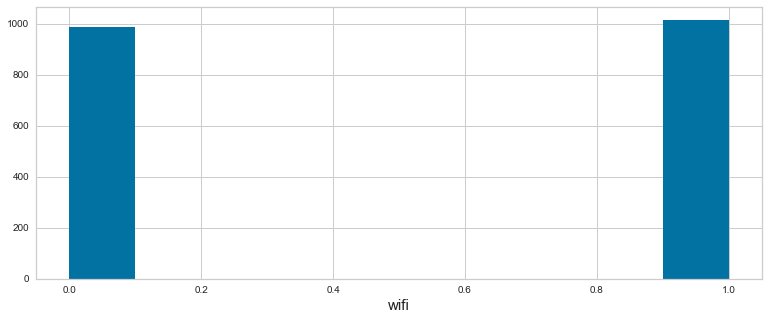

In [106]:
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<7:
    fig = plt.figure(figsize = [13,5])
    plt.subplot(111)    
    a = Categorical[i]                  
    plt.hist(dados[a])

    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    

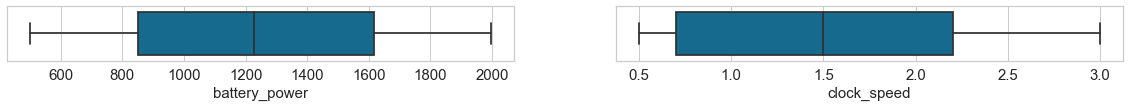

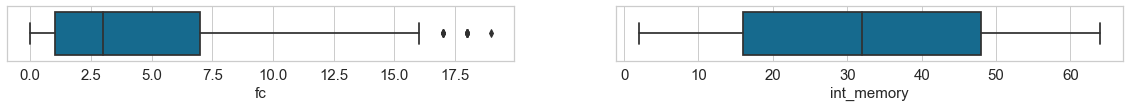

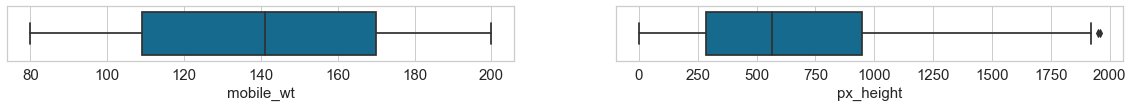

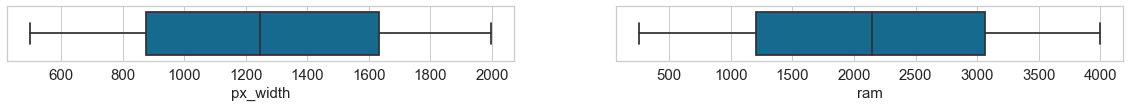

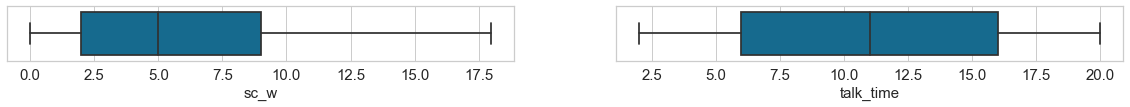

In [107]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','px_height','px_width','ram','sc_w','talk_time']
         
i = 0
while i<10:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   
    sns.boxplot(x = Numerical[i], data=dados) 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=dados) 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

[Voltar para o sumário](#sumario)

___
<div id='prediction'></div>

## 3. Modelos de Predição

Descrever e justificar pelo menos **DUAS** técnicas de predição.

### Criando base de teste e treinamento 

A base da dados deve ser seraparada entre uma parte qual será responsável por ensinar o algoritmo a fazer as predições, e em outra na qual o robô será testato, para verificar sua eficiência. 

In [73]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi']
x = dados.loc[:, features]
y = dados.loc[:, ['price_range']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .60)

x_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
891,1652,0,0.6,1,4,1,40,1.0,198,7,352,1084,3592,7,6,6,1,0,0
1796,793,1,2.8,1,1,1,64,0.4,179,4,818,1006,2296,12,0,5,1,1,0
1868,1766,1,0.5,1,1,1,22,0.8,122,8,291,1318,3297,7,5,16,1,0,0


In [74]:
x_test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,154,550,2678,16,5,13,1,0,1


### Árvore de Decisão

A criação da árvore de decisão consiste em dividir os dados  utilizando as categorias das variáveis independentes de forma que os novos grupos de dados obtidos sejam cada vez mais uniformes. Essas divisões criam nós de decisão, que estabelecem o critério que será utilizado para um elemento seguir por um caminho ou por outro. Os últimos grupos da divisão serão os mais uniformes possíveis em relação a target, indicando que os caminhos criados já permitem classificar os elementos.


Dessa forma, aplicando o modelo da árvore de decisão gerado na base de testes, cada elemento irá "percorrer" um determinado caminho definido pelos nós de decisão até serem classificados, quando atingem os nós folhas.

https://blog.somostera.com/data-science/arvores-de-decisao

https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

#### Criando a árvore de decisão

In [75]:
arvre = DecisionTreeClassifier(criterion = "gini", random_state = 100)
arvre.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

#### Visualizando a árvore

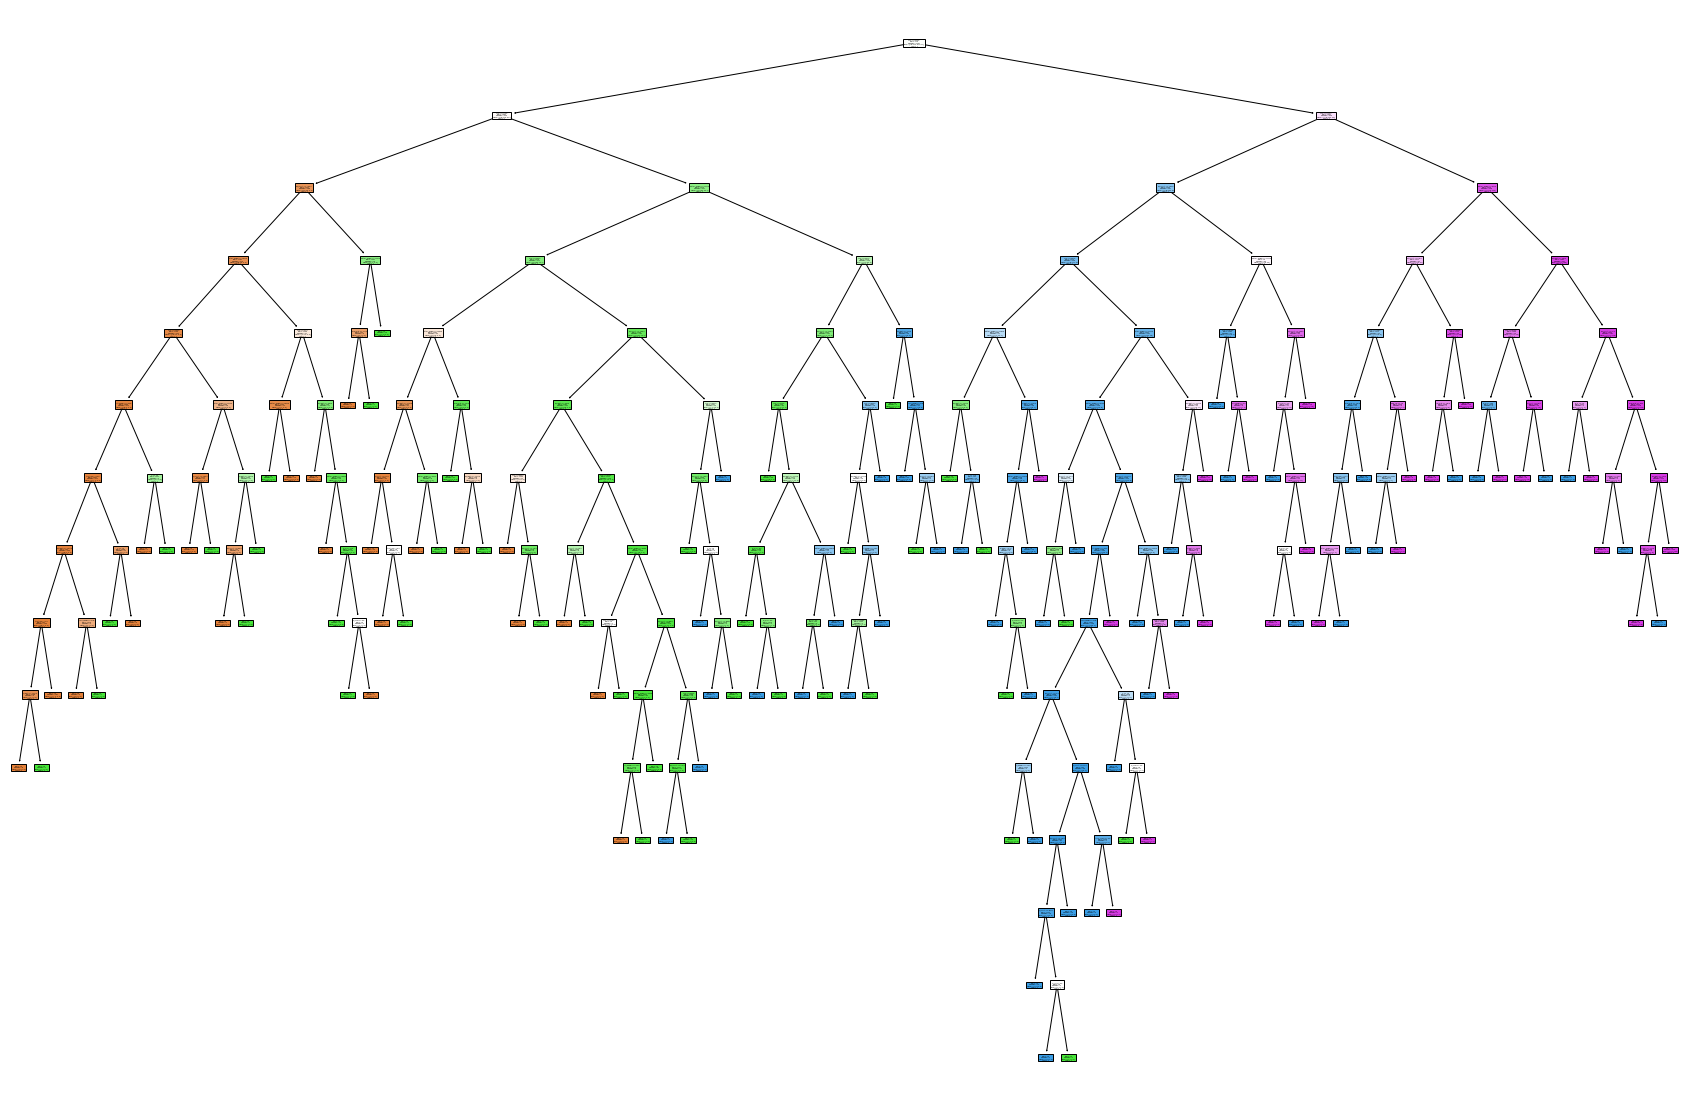

In [76]:
from sklearn import tree
%matplotlib inline

target_names = ['0', '1','2','3']
fig = plt.figure(figsize=(30,20))
plot= tree.plot_tree (arvre,feature_names=features,class_names=target_names,filled=True) 
plt.show()

#### Aplicando o modelo para classificar a base de testes e verificando sua acurácia

In [77]:
predicted_arvre = arvre.predict(x_test)
acuracia_arvre = metrics.accuracy_score(y_test, predicted_arvre)

print(f'Acurácia do modelo de árvore de decisão na base de testes: {acuracia_arvre*100:.4f}%')

Acurácia do modelo de árvore de decisão na base de testes: 84.7500%


### Método de Regressão Múltipla

A regressão logística multinomial é utilizada quando a variável que se quer prever é nominal e se divide em mais de duas categorias. Esse método de classificação utiliza uma combinação linear das características observadas nas variáveis independentes para prever as probabilidades de um elemento pertencer cada categoria da variável dependente.

No caso da regressão multinomial, o coeficiente de regressão associado a uma variável dependente indica o quanto aquela variável aumenta (se for positivo) ou diminui (se for negativo) a probabilidade de um elemento pertencer a uma determinada categoria.

- Equacionando:
P(i, k) = βk ∙ Xi

Onde Xi é a matriz de variáveis explicativas que descrevem a observação i, βk é um vetor de coeficientes correspondentes ao resultado da categoria k e P(i, k) é a probabilidade de um elemento i ser observado na categoria k. A classificação do elemento será a categoria cuja probabilidade de ele ser observado é maior.

https://en.wikipedia.org/wiki/Multinomial_logistic_regression#:~:text=Multinomial%20logistic%20regression%20is%20used,are%20more%20than%20two%20categories.

#### Criando o modelo de regressão:

In [111]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x_train, y_train)

c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


#### Aplicando o modelo e a taxa de acerto das previsões

In [112]:
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(x_train)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(x_test)))

Multinomial Logistic regression Train Accuracy ::  0.9866666666666667
Multinomial Logistic regression Test Accuracy ::  0.97125


[Voltar para o sumário](#sumario)

___
<div id='validation'></div>

## 4. Processo e Estatísticas de validação

Calcular medidas que informam a performance de cada modelo ajustado. Para cada um:

* Dividir a base de dados em **Treinamento** e **Teste**. Usar **Treinamento** para estimar cada modelo.

* Estudar medidas que validam os modelos.

    Exemplos:

    * <a href='https://help.salesforce.com/s/articleView?id=sf.bi_edd_model_metrics_cross_validation_measure.htm&type=5'>Cross Validation Tab for Numeric Use Cases</a>

    * <a href='https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b'>Como saber se seu modelo de Machine Learning está funcionando mesmo</a>

    * <a href='https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/'>Modelos Preditivos de Notas de Redação do ENEM 2015</a>

* Discutir sobre overfitting e underfitting (<a href='https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/'>link</a>)

* **Extra**: Faça o processo de Validação Cruzada utilizando também 10 ciclos e calcule a performance média e desvio padrão das duas medidas R2 e RMS tanto para a parte treinamento como para a parte teste. Discuta com riqueza de detalhes.

c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


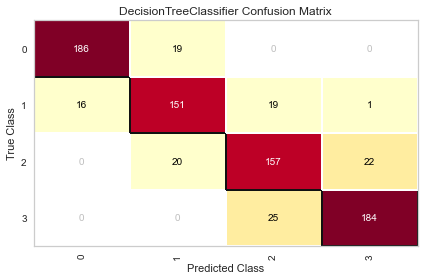

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [113]:
cm_arvore = ConfusionMatrix(
    arvre, classes=[0,1,2,3])


cm_arvore.fit(x_train, y_train)
cm_arvore.score(x_test, y_test)

cm_arvore.poof()



In [114]:
for i in range(10):

    x = dados.drop(["price_range"],axis=1)
    y = dados["price_range"].values.reshape(-1,1) 
 
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .60)

c:\Users\Verônica Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


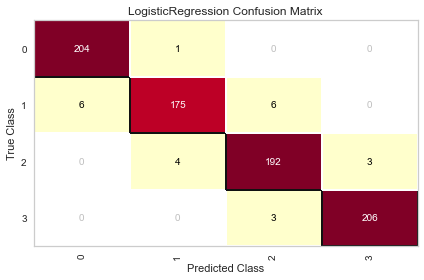

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [115]:
cm_logic = ConfusionMatrix(
    mul_lr, classes=[0,1,2,3])


cm_logic.fit(x_train, y_train)
cm_logic.score(x_test, y_test)

cm_logic.poof()

----> fazer histograma das acurácias e tirar var e e delas

[Voltar para o sumário](#sumario)

___
<div id='conclusion'></div>

## 5. Conclusão

[Voltar para o sumário](#sumario)

___
<div id='ref'></div>

## 6. Referências Bibliográficas

- Banco de dados:
https://www.kaggle.com/datasets/muhammetvarl/laptop-price
- Método de Regressão Múltipla:
https://dataaspirant.com/implement-multinomial-logistic-regression-python/
- Árvore
https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5
- matriz e confusão:
https://medium.com/data-hackers/entendendo-o-que-é-matriz-de-confusão-com-python-114e683ec509

[Voltar para o sumário](#sumario)